##Context

The Mall Customers dataset contains the spending of customers. The objective is to make clusters on the basis of other features.

##Content

In this dataset we have 5 columns:

CustomerID	
Genre	
Age	
Annual 
Income (k$)	
Spending Score (1-100)

###Load the Libraries

In [ ]:
# =============================================================================
# Setting the Envoirnment
# =============================================================================

import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from scipy.spatial.distance import cdist 
import seaborn as sns
import matplotlib.pyplot as plt
#%matplotlib inline
import os

Load the dataset

In [ ]:
df=pd.read_csv('/content/drive/MyDrive/Data_Machine_Learning/Mall_Customers.csv')

Exploratory Data Analysis

In [ ]:
#Top 5 rows of Data
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [ ]:
# Find the shape of Data
df.shape

(200, 5)

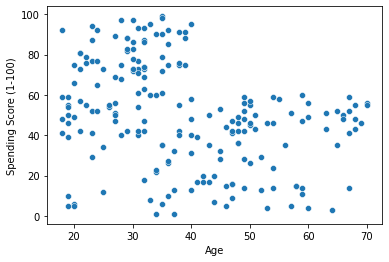

In [ ]:
# Find the relationship between Age and Spending Score
sns.scatterplot(data=df, x="Age", y='Spending Score (1-100)')

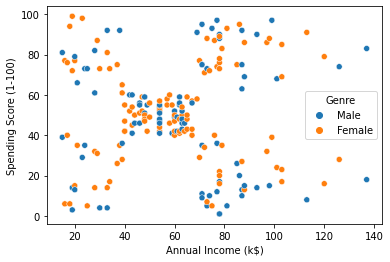

In [ ]:
# Find the Gender wise relationship between Annual Income and Spending Score
sns.scatterplot(data=df, x="Annual Income (k$)", y='Spending Score (1-100)', hue="Genre")

In [ ]:
df.shape

(200, 5)

Drop the Redundant Column

In [ ]:
# =============================================================================
# Dropping Redundant Columns
# =============================================================================
df = df.drop(['CustomerID'], axis=1)

Convert Categorical column into numerical column

In [ ]:
# =============================================================================
# Converting Categorical Features into Numeric
# =============================================================================

labelEncoder = LabelEncoder()
labelEncoder.fit(df['Genre'])
df['Genre'] = labelEncoder.transform(df['Genre'])

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype
---  ------                  --------------  -----
 0   Genre                   200 non-null    int64
 1   Age                     200 non-null    int64
 2   Annual Income (k$)      200 non-null    int64
 3   Spending Score (1-100)  200 non-null    int64
dtypes: int64(4)
memory usage: 6.4 KB


Through Elbow Plot Method finding the number of optimum clusters 

In [ ]:
# Elbow plot Method
k_rng=range(1,10)
sse=[]

for k in k_rng:
  km=KMeans(n_clusters=k)
  km.fit(df)
  sse.append(km.inertia_)

In [ ]:
sse

[308862.06000000006,
 212889.44245524303,
 143391.59236035676,
 104414.67534220168,
 75399.61541401484,
 58348.641363315044,
 51167.19736842104,
 44389.80767355766,
 40665.351074780236]

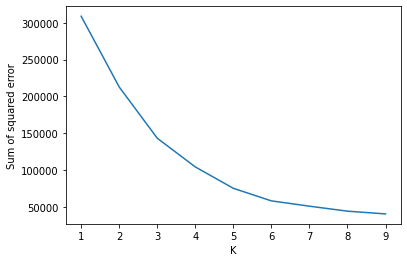

In [ ]:
plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.plot(k_rng,sse)

In [ ]:
km=KMeans(n_clusters=5)
km

KMeans(n_clusters=5)

In [ ]:
y_predicted=km.fit_predict(df)
y_predicted

array([2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3,
       2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3,
       2, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 1, 0, 1, 4, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 4, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1], dtype=int32)

In [ ]:
df1=df.copy()

In [ ]:
df1['Group']=y_predicted

In [ ]:
df1.head()

,Genre,Age,Annual Income (k$),Spending Score (1-100),Group
0,1,19,15,39,2
1,1,21,15,81,3
2,0,20,16,6,2
3,0,23,16,77,3
4,0,31,17,40,2


No handles with labels found to put in legend.


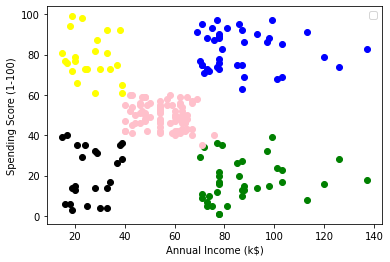

In [ ]:
# Without Scaling the Data 
df2=df1[df1.Group==0]
df3=df1[df1.Group==1]
df4=df1[df1.Group==2]
df5=df1[df1.Group==3]
df6=df1[df1.Group==4]

plt.scatter(df2['Annual Income (k$)'],df2['Spending Score (1-100)'],color='green')
plt.scatter(df3['Annual Income (k$)'],df3['Spending Score (1-100)'],color='blue')
plt.scatter(df4['Annual Income (k$)'],df4['Spending Score (1-100)'],color='black')
plt.scatter(df5['Annual Income (k$)'],df5['Spending Score (1-100)'],color='yellow')
plt.scatter(df6['Annual Income (k$)'],df6['Spending Score (1-100)'],color='pink')


plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()

Since our Data is properly Scaled, we didn't used scaling method for data Standardization. If in case it needed, you can find below code to standardize the data.

In [ ]:
# Scaling the Data
scaler=MinMaxScaler()

In [ ]:
df_scaled = scaler.fit_transform(df.to_numpy())
df_scaled = pd.DataFrame(df_scaled, columns=[
  'Genre', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)'])

In [ ]:
df.columns

Index(['Genre', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)'], dtype='object')

In [ ]:
df_scaled.head()

,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1.0,0.019231,0.000000,0.387755
1,1.0,0.057692,0.000000,0.816327
2,0.0,0.038462,0.008197,0.051020
3,0.0,0.096154,0.008197,0.775510
4,0.0,0.250000,0.016393,0.397959
